In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
import cdsapi
from numpy.linalg import svd
from scipy.optimize import minimize
from numpy.linalg import matrix_rank
import scipy

#import cdstoolbox as ct


In [2]:
panel_data = pd.read_pickle('panel_data')
data = pd.read_pickle('data')
panel_data2 = pd.read_pickle('panel_data2')
data2 = pd.read_pickle('data2')
#data['INM_CM4'] = data2['INM_CM4']
#data['CAMS_CSM1'] = data2['CAMS_CSM1']
proj = pd.read_pickle('projections')

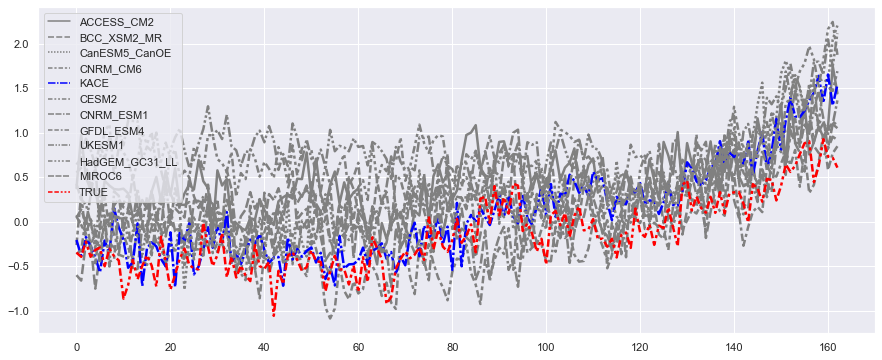

In [3]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
palette = {c:'red' if c=='TRUE' else 'blue' if c=='KACE' else 'grey' for c in panel_data.model.unique()}

sns.lineplot(data=data, linewidth=2.5,palette=palette)


panel_data
plt.savefig('temp1')

In [4]:
proj

,ACCESS_CM2,BCC_XSM2_MR,CanESM5_CanOE,CNRM_CM6,KACE,CESM2,CNRM_ESM1,GFDL_ESM4,UKESM1,HadGEM_GC31_LL,MIROC6
0,2.192911,0.930684,2.036687,1.971929,1.784486,1.514276,1.284411,0.757471,2.034565,2.454116,0.804869
1,2.076397,1.510546,1.763232,1.529481,1.790835,1.397761,1.406644,1.168522,2.307194,2.060158,0.985175
2,1.984288,1.287989,2.449264,1.038935,1.967710,1.305652,1.251774,0.672957,2.433012,2.775840,1.182812
3,2.372274,1.091322,2.339755,1.427129,1.532328,1.693639,1.337593,0.958271,2.344813,2.531013,1.493820
4,1.743446,1.418214,2.728170,1.391812,1.951774,1.064810,1.176898,1.039623,2.473669,2.547947,1.916205
5,2.204255,1.132816,2.273553,1.254371,2.168281,1.525619,1.879654,1.540300,2.550606,2.581470,1.552623
6,2.172036,1.367114,2.628696,1.704521,2.549220,1.493401,2.160151,1.161114,2.899829,2.192544,1.293446
7,2.149017,1.143746,2.781628,2.185024,2.379565,1.470381,1.407566,1.414248,2.839142,2.814822,1.571967
8,2.366771,1.280317,2.830437,1.773653,2.811929,1.688135,1.816908,1.149742,2.966970,2.471898,1.548329
9,2.820357,1.456142,2.924438,1.792671,2.387379,2.141721,1.798921,1.361322,3.053297,2.848452,1.845437


In [5]:
from sklearn.metrics import mean_squared_error

def find_initial_errors(df):
    diction = dict()
    for (index, colname) in enumerate(df):
        diction[colname] = mean_squared_error(df[colname], df['TRUE'], squared='FALSE')
    print(diction)
    keys = list(diction.keys())
# get values in the same order as keys, and parse percentage values
    vals = [float(diction[k]) for k in keys]
    f, ax = plt.subplots(figsize=(15, 6))

    sns.barplot(x=keys, y=vals)
    return diction

{'ACCESS_CM2': 0.49331557789127595, 'BCC_XSM2_MR': 0.18684780471072399, 'CanESM5_CanOE': 0.3210646409663524, 'CNRM_CM6': 0.14410759688621047, 'KACE': 0.15026140306994745, 'CESM2': 0.26554959257373734, 'CNRM_ESM1': 0.2134831471840875, 'GFDL_ESM4': 0.21720294538433021, 'UKESM1': 1.1205402510203701, 'HadGEM_GC31_LL': 0.959958410216865, 'MIROC6': 0.3782243752391241, 'TRUE': 0.0}


,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,model
ACCESS_CM2,0.375954,0.973208,0.497969,0.357068,0.355483,0.075743,0.457747,0.404658,0.364769,0.359265,...,0.877988,1.331639,0.754243,0.893143,1.070729,0.946666,1.065684,1.747993,1.440901,ACCESS_CM2
BCC_XSM2_MR,-0.601654,-0.662668,-0.236120,-0.233272,-0.753469,-0.352483,-0.217083,-0.243474,-0.290667,-0.375541,...,0.771382,0.562137,1.137145,0.848418,0.772349,0.733400,0.820573,0.953064,0.918503,BCC_XSM2_MR
CanESM5_CanOE,0.070961,-0.037884,-0.114808,0.024674,-0.313223,0.342073,0.041480,-0.054697,0.089825,0.022939,...,1.484307,1.195094,1.546099,1.464548,1.579082,1.599628,1.562484,2.044906,2.201975,CanESM5_CanOE
CNRM_CM6,-0.263155,0.319128,-0.195107,-0.306039,-0.075585,-0.040837,-0.096191,0.090064,-0.148201,-0.279353,...,1.067770,1.397045,1.240175,0.899289,1.122791,1.109937,1.030424,1.123876,1.082332,CNRM_CM6
KACE,-0.206761,-0.384065,-0.173415,-0.275843,-0.398944,-0.570094,-0.213835,-0.354035,0.150916,-0.065190,...,1.173276,1.244752,1.361589,1.447278,1.636726,1.334453,1.651888,1.306054,1.536155,KACE
CESM2,0.057175,-0.042319,-0.133353,0.023327,-0.064955,-0.464965,0.064814,-0.452447,-0.422981,0.120920,...,1.224203,1.257094,1.517293,1.265665,1.108791,1.507458,1.512052,1.466749,1.689176,CESM2
CNRM_ESM1,0.424696,0.248771,0.194304,-0.006229,-0.238467,-0.277502,-0.013747,-0.504865,0.339638,0.290103,...,1.101596,1.184901,0.985517,1.596023,1.009894,1.104560,0.983257,1.093769,1.049651,CNRM_ESM1
GFDL_ESM4,-0.363606,-0.324211,0.041495,-0.269533,-0.468456,-0.063029,0.278416,-0.076807,0.196711,-0.371597,...,0.391741,0.796102,0.320017,0.413391,0.657472,0.985515,0.578576,0.767760,0.846035,GFDL_ESM4
UKESM1,0.640044,0.712845,0.932074,0.806349,0.632522,0.871653,0.699701,0.936906,0.815910,1.031701,...,1.511475,1.248112,1.406077,1.794811,1.795474,1.649651,2.046785,1.740632,2.113947,UKESM1
HadGEM_GC31_LL,0.549923,0.604639,0.642588,0.375610,0.591042,0.710176,1.019449,1.091706,0.507917,0.833559,...,1.688518,1.776143,1.970851,1.823069,1.507112,1.816843,2.161680,2.242140,1.872814,HadGEM_GC31_LL


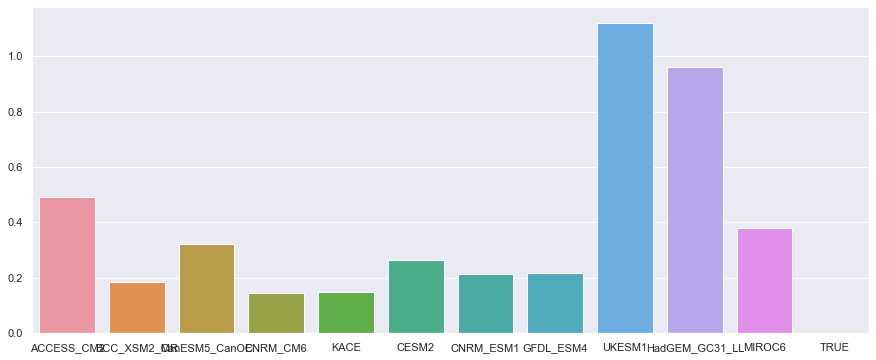

In [6]:

find_initial_errors(data)
panel_data

# Synthetic Controls

In [7]:
#first approach naive least square regression with no additional predictors 
#test with one of the models because current true temperature data do not seem correct
from scipy.optimize import fmin_slsqp
from sklearn.metrics import mean_squared_error



In [8]:

X1_all =  panel_data.loc['TRUE']
X0_all = panel_data.loc[panel_data.index != 'TRUE', :]

#use years 120-150 as predictors leave rest  for validation
X0 = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1 = X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
X0_val = X0_all.loc[:,[i for i in list(range(0, 163))]].values.T
X1_val = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
#5-year avg
X0_mean = X0_all.loc[:,[i for i in list(range(0, 120))]].values
X1_mean = X1_all.loc[[i for i in list(range(0, 120))]].values.reshape(-1,1)
X0_mean_val = X0_all.loc[:,[i for i in list(range(120, 160))]].values
X1_mean_val = X1_all.loc[[i for i in list(range(120, 160))]].values.reshape(-1,1)
X1_mean = np.average(X1_mean.reshape(-1, 5), axis=1).reshape(-1,1)
#X0_mean = np.average(X0_mean.reshape(-1, 5), axis=1).reshape(24,13)
#X0_mean_val = np.average(X0_mean_val.reshape(-1, 5), axis=1).reshape(8,13)
X1_mean_val = np.average(X1_mean_val.reshape(-1, 5), axis=1).reshape(-1,1)
#use years 0-50
X0_zero = X0_all.loc[:,[i for i in list(range(0, 50))]].values.T
X1_zero = X1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 100-163
X0_100_163 = X0_all.loc[:,[i for i in list(range(100, 163))]].values.T
X1_100_163 = X1_all.loc[[i for i in list(range(100, 163))]].values.reshape(-1,1)
#use years 10-60
X0_ten = X0_all.loc[:,[i for i in list(range(10, 60))]].values.T
X1_ten = X1_all.loc[[i for i in list(range(10, 60))]].values.reshape(-1,1)
#use years 20-70
X0_20 = X0_all.loc[:,[i for i in list(range(20, 70))]].values.T
X1_20 = X1_all.loc[[i for i in list(range(20, 70))]].values.reshape(-1,1)
#use years 0-70
X0_zero_70 = X0_all.loc[:,[i for i in list(range(0, 70))]].values.T
X1_zero_70 = X1_all.loc[[i for i in list(range(0, 70))]].values.reshape(-1,1)
#use years 50-100
X0_fifty = X0_all.loc[:,[i for i in list(range(50, 100))]].values.T
X1_fifty = X1_all.loc[[i for i in list(range(50, 100))]].values.reshape(-1,1)
#use years 100-150
X0_hundreed = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1_hundreed= X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 90-140
X0_120_140= X0_all.loc[:,[i for i in list(range(90, 140))]].values.T
X1_120_140 = X1_all.loc[[i for i in list(range(90, 140))]].values.reshape(-1,1)
#use years 160-100
X0_110_163 = X0_all.loc[:,[i for i in list(range(110, 163))]].values.T
X1_110_163 = X1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
X0_0_150 = X0_all.loc[:,[i for i in list(range(0, 150))]].values.T
X1_0_150 = X1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)
#use years 100-120
X0_interv_20 = X0_all.loc[:,[i for i in list(range(100, 120))]].values.T
X1_interv_20 = X1_all.loc[[i for i in list(range(100, 120))]].values.reshape(-1,1)
X0_all_plot = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X1_all_plot = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [9]:
def w_mse(w,  x0, x1, v): return mean_squared_error(x1, x0.dot(w), sample_weight=v)
def w_constraint(w,  x0, x1,v): return np.sum(w) - 1 

def v_constraint(V, W, X0, X1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w,  bounds=[(0, 1.0)]*len(w),f_eqcons=w_constraint, 
                                           args=( x0, x1,v), disp=False, full_output=True)[0]
def solve_synthetic_control_basic(X0, X1,weight=False):
    k,j= X0.shape
    V = (1/k)*np.ones(k)
    l = np.linspace(1/k,1,k,endpoint=True)
    if weight:
        for i in range(0,k):
            V[i]=l[i]*2
    W0 = 1/j*np.zeros(j).transpose()
    W = fun_w(W0, V, X0, X1)
   # print(W)
    #print(V)
    return V, W



In [10]:
def remain_error(W, df_donors,df_true, low_bound,up_bound):
    l = list(range(0, low_bound))+list(range(up_bound+1, 163))
    df1 = df_true.loc[[i for i in l]].values.reshape(-1,1)
    df0 = df_donors.loc[:,[i for i in l]].values
    return mean_squared_error( df1,(df0.T).dot(W),squared=False) 
    

mean squared reconstruction error using T=120-150:  0.12139507305160276
validation error:  0.37005922142179093
W: [6.73995600e-18 3.08275546e-18 1.31530634e-17 2.23758216e-01
 4.75196641e-18 7.08166568e-18 2.42927521e-01 5.33314263e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
mean squared reconstruction error using T=0-50:  0.11202161086767538
validation error:  0.3569471839277483
W: [0.00000000e+00 8.37947739e-18 0.00000000e+00 4.12801757e-01
 5.87198243e-01 7.54871975e-18 2.77971864e-17 0.00000000e+00
 0.00000000e+00 1.93876169e-17 0.00000000e+00]
mean squared reconstruction error using T=10-60:  0.11084280692530005
validation error:  0.35645854215719075
W: [0.00000000e+00 3.48263751e-17 8.78614859e-17 3.93088987e-01
 5.94708413e-01 1.01933693e-17 2.22866326e-17 1.22025999e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
mean squared reconstruction error using T=20-70:  0.11193579129731003
validation error:  0.3689425700378143
W: [1.00759064e-17 0.00000000e+00 1.60254116e-17 

<Figure size 1260x324 with 0 Axes>

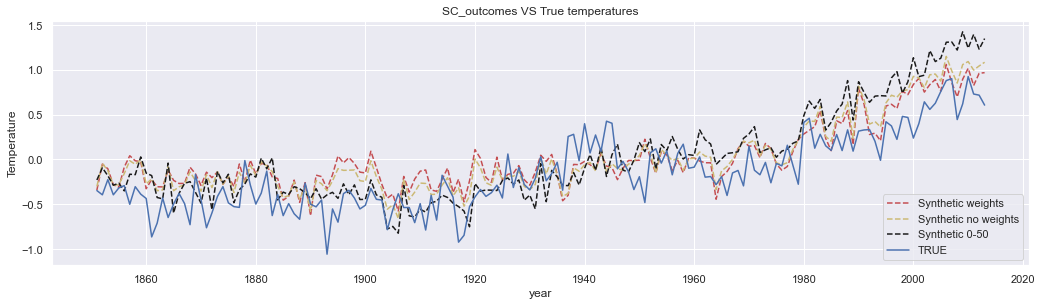

0.11271854716211883
[0.00000000e+00 5.15251554e-18 5.93958941e-17 3.92768458e-01
 6.07231542e-01 7.37040883e-18 2.07840774e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.81065497e-17]


In [11]:
w = pd.DataFrame()
#use 120-150
V1, W1 = solve_synthetic_control_basic(X0, X1)
SC_outcomes0 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error = remain_error(W1, X0_all,X1_all, 120,150)
print('mean squared reconstruction error using T=120-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w['T=120-150'] = W1
#use 0-50
V, W = solve_synthetic_control_basic(X0_zero, X1_zero)
SC_outcomes1 = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
print('W:', W)
w['T=0-50'] = W

#use 10-60
V0, W0 = solve_synthetic_control_basic(X0_ten, X1_ten)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 10,60)
print('mean squared reconstruction error using T=10-60: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=10-60'] = W0
#use 20-70
V0, W0 = solve_synthetic_control_basic(X0_20, X1_20)
SC_outcomes2 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 20,70)
print('mean squared reconstruction error using T=20-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=20-70'] = W0
#use 50-100
V0, W0 = solve_synthetic_control_basic(X0_fifty, X1_fifty)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W0, X0_all,X1_all, 50,100)
print('mean squared reconstruction error using T=50-100: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=50-100'] = W0
#use 120-140
V0, W0 = solve_synthetic_control_basic(X0_120_140, X1_120_140)
SC_outcomes3 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 90,140)
print('mean squared reconstruction error using T=90-140: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=90-140'] = W0
#use100-150
V0, W5 = solve_synthetic_control_basic(X0_hundreed, X1_hundreed)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W5, X0_all,X1_all, 100,150)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w['T=100-150'] = W5



#use 100-163
V0, W= solve_synthetic_control_basic(X0_100_163, X1_100_163,True)
SC_outcomes = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error = remain_error(W, X0_all,X1_all, 0,100)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
print('W:', W)
w['T=110-163'] = W


#use 0-70
V0, W0 = solve_synthetic_control_basic(X0_zero_70, X1_zero_70)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,70)
print('mean squared reconstruction error using T=0-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=0-70'] = W0

#use all
V0, W0_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,True)
SC_outcomes_w = (X0_all_plot.T).dot(W0_weight)
true_outcomes = X1_all_plot
true_error = 0
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_weight)))
print('validation error: - ')
print('W:', W0_weight)
w['T=0-163_w'] = W0_weight
fig = plt.figure(figsize=(17.5,4.5)) 

V0, W0_no_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,False)
SC_outcomes = (X0_all_plot.T).dot(W0_no_weight)
true_outcomes = X1_all_plot
true_error = 0
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error: - ')
print('W:', W0_no_weight)
w['T=0-163'] = W0_no_weight
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");

plt.plot(range(1851,2014),SC_outcomes,'y--', label="Synthetic no weights");
plt.plot(range(1851,2014),SC_outcomes1,'k--', label="Synthetic 0-50");
plt.plot(range(1851,2014),true_outcomes, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures")
plt.show()
fig.savefig("sc1", dpi=300)
print(mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print(W0)

In [12]:
w

,T=120-150,T=0-50,T=10-60,T=20-70,T=50-100,T=90-140,T=100-150,T=110-163,T=0-70,T=0-163_w,T=0-163
0,6.739956e-18,0.000000e+00,0.000000e+00,1.007591e-17,5.688621e-02,3.297739e-02,6.739956e-18,0.000000e+00,0.000000e+00,3.855436e-17,2.120043e-17
1,3.082755e-18,8.379477e-18,3.482638e-17,0.000000e+00,1.248311e-01,1.024951e-01,3.082755e-18,5.857016e-02,5.152516e-18,1.142911e-01,5.569907e-02
2,1.315306e-17,0.000000e+00,8.786149e-17,1.602541e-17,2.580401e-17,0.000000e+00,1.315306e-17,2.912624e-17,5.939589e-17,0.000000e+00,1.459146e-16
3,2.237582e-01,4.128018e-01,3.930890e-01,4.155317e-01,3.213503e-01,3.899889e-01,2.237582e-01,2.361806e-01,3.927685e-01,4.833363e-01,4.790367e-01
4,4.751966e-18,5.871982e-01,5.947084e-01,5.844683e-01,4.969324e-01,9.378349e-18,4.751966e-18,0.000000e+00,6.072315e-01,0.000000e+00,1.757554e-01
5,7.081666e-18,7.548720e-18,1.019337e-17,1.993367e-17,0.000000e+00,3.306817e-18,7.081666e-18,0.000000e+00,7.370409e-18,0.000000e+00,6.299644e-17
6,2.429275e-01,2.779719e-17,2.228663e-17,9.647223e-18,3.415237e-18,1.123278e-01,2.429275e-01,0.000000e+00,2.078408e-18,4.077909e-17,0.000000e+00
7,5.333143e-01,0.000000e+00,1.220260e-02,2.148123e-18,1.778092e-17,3.622108e-01,5.333143e-01,7.052493e-01,0.000000e+00,4.023726e-01,2.895088e-01
8,0.000000e+00,0.000000e+00,0.000000e+00,2.374642e-17,0.000000e+00,3.455894e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.445481e-18
9,0.000000e+00,1.938762e-17,0.000000e+00,0.000000e+00,1.192622e-17,0.000000e+00,0.000000e+00,2.077855e-17,0.000000e+00,4.349113e-17,0.000000e+00


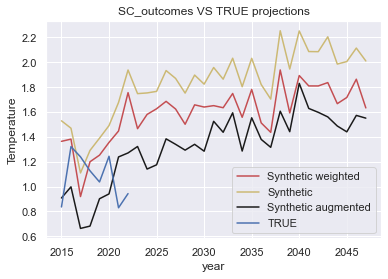

[0.8364805221400101, 1.3215710799326201, 1.2396620313735012, 1.1272278534155247, 1.0374700743273226, 1.2442480213989162, 0.8299812642028578, 0.943871047508812]
0.35763703957849824


In [106]:
proj = pd.read_pickle('projections')
proj2 = pd.read_pickle('projections2')
#proj['INM_CM4'] = proj2['INM_CM4']
#proj['CAMS_CSM1'] = proj2['CAMS_CSM1']
X=proj
predicted_temp= (X).dot(W0_weight)
predicted_temp_no= (X).dot(W0_no_weight)
pred = (X).dot(wasc)
true = 'Downloads/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'
fh = Dataset(true, mode='r')
tas = fh.variables["tas_mean"][:]
temp_mean = tas.mean(axis =(1,2))
proj_true_temp=temp_mean[1979:]
proj_true_temp = np.average(proj_true_temp.reshape(-1, 3), axis=1)
proj =[]
for i in range(0,29,4):
    proj.append(proj_true_temp[i])
plt.plot(range(2015,2048),predicted_temp, 'r-', label="Synthetic weighted");
plt.plot(range(2015,2048),predicted_temp_no, 'y-', label="Synthetic");
plt.plot(range(2015,2048),pred, 'k-', label="Synthetic augmented");
plt.plot(range(2015,2023),proj, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS TRUE projections")
plt.savefig('projections')
plt.show()
print(proj)
print(mean_squared_error( np.array(proj),pred[:8],squared=False))

(11, 163)
(11, 33)
(196, 11)


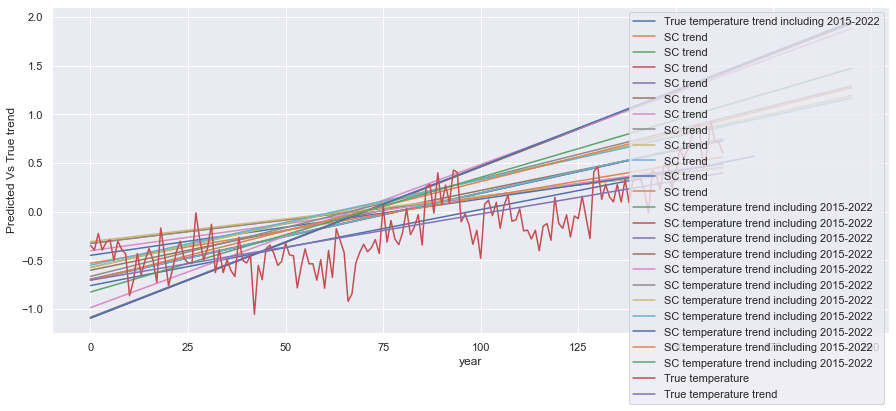

[0.00000000e+00 5.15251554e-18 5.93958941e-17 3.92768458e-01
 6.07231542e-01 7.37040883e-18 2.07840774e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.81065497e-17]


In [14]:
from sklearn.linear_model import LinearRegression
x=np.arange(0,163).reshape(-1, 1)
x2= np.arange(0,163+8).reshape(-1, 1)
x3= np.arange(0,196).reshape(-1, 1)
model = LinearRegression()
model.fit(x, X1_all_plot)
# calculate trend
trend_true = model.predict(x)
model.fit(x,(X0_all_plot.T).dot(w))
trend_sc =  model.predict(x)
#calculate trend until 2022
print(X0_all_plot.shape)
print(X.to_numpy().T.shape)
extended_true = np.concatenate((X1_all_plot.reshape(163),np.array(proj).reshape(8)))
extended_synthetic = np.concatenate((X0_all_plot.T,X.to_numpy()))
model.fit(x2, extended_true)
extended = model.predict(x2)
print(extended_synthetic.shape)
model.fit(x3, extended_synthetic.dot(w))
extended_s = model.predict(x3)

# plot trend
f, ax = plt.subplots(figsize=(15, 6))
plt.plot(extended, label ='True temperature trend including 2015-2022')
plt.plot(trend_sc , label ='SC trend')
plt.plot(extended_s, label ='SC temperature trend including 2015-2022')
plt.plot(X1_all_plot, label ='True temperature')
plt.plot(trend_true, label = 'True temperature trend ')
plt.ylabel('Predicted Vs True trend')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.show()
print(W0)

In [15]:
def find_trend(y):
    x=np.arange(0,163).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
# calculate trend
    trend_true = model.predict(x)
    model.fit(x,y)
    return  model.predict(x)
    

In [16]:
trends ={}
for i in panel_data['model']:
    XT1 = panel_data.loc[i].loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
    trends[i]=find_trend(XT1).flatten()
trend = pd.DataFrame.from_dict(trends)    

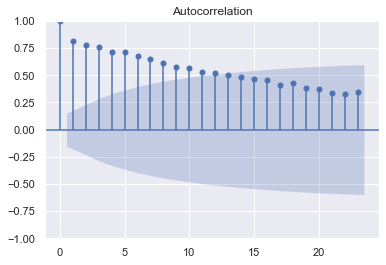

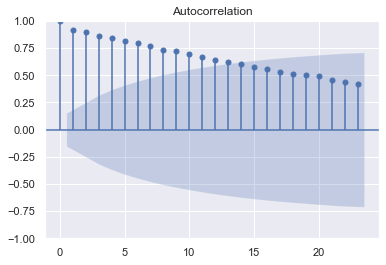

ADF Statistic: -0.3321011443288301
p-value: 0.9208331947878468
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.577


In [17]:
import nlopt


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

date = np.arange(1850,2013)
tr = pd.DataFrame()
tr['date'] = date
tr['obs'] = X1_all_plot
tr['synthetic'] = (X0_all_plot.T).dot(W0)
tr.set_index(['date'])
tr
plot_acf(tr['obs'])
plt.savefig('auto')
plt.show()
plot_acf(tr['synthetic'])
plt.show()
results = adfuller(X1_all_plot)
print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print("\t%s: %.3f" % (key, value))

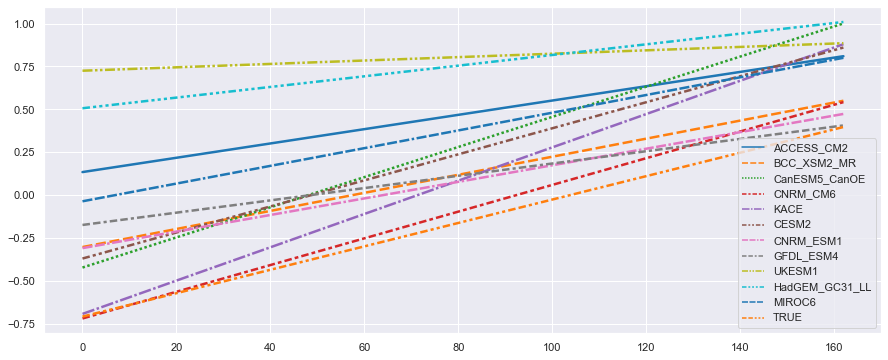

In [18]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=trend, palette="tab10", linewidth=2.5)
plt.savefig("trend")

#  general Synthetic controls

In [49]:
def w_mse(w,  x0, x1,v): return mean_squared_error(x1, x0.dot(w), sample_weight=v)

def w_constraint(w,  x0, x1,v): return np.sum(w) - 1

def v_constraint(V, W, X0, X1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=( x0, x1 , v), disp=False, full_output=True)[0]
def solve_synthetic_control_basic(X0, X1):
    
    k,j= X0.shape
    V = 1/k*np.ones(k)
    for i in (1,k-1):
        V[i] +=V[i-1]
    W0 = 1/j*np.zeros(j).transpose()
    W = fun_w(W0, V, X0, X1) 
    return V, W

In [50]:
def get_lambda_values(control,lambda_max, ratio=1e-8, number_lambda = 20):
    U , sing, V = svd(control)
    if (lambda_max==0):
        largest_l = sing[0]
    else:
         largest_l =lambda_max
    smallest = (ratio) * largest_l
    lambdas = np.linspace(smallest, largest_l, num=number_lambda, endpoint=True)
    return lambdas

In [51]:
def choose_lambda (lambdas, lambda_errors):
    # lambda with smallest error
    minpos = np.argmin(lambda_errors)
    min_error = min(lambda_errors)
    lambda_min = lambdas[minpos]
    return lambda_min

In [107]:
def objective(W,X0,X1,W_scm,l):
     return mean_squared_error(X1,(X0).dot(W))/l + mean_squared_error(W,W_scm)
    


In [108]:
def ridge_ASCM(X0,X1, holdout_length,ratio=1e-8, n_lambda = 20,lambda_max=0):
    V, synthetic_weights = solve_synthetic_control_basic(X0, X1)
    lamda =[]
    if (lamda==[]):
        lamda.append(cv_lambda(X0, X1,  holdout_length, 
                      lambda_max, ratio, n_lambda))
    W_Ridge = minimize(objective, synthetic_weights, method='nelder-mead', args =(X0,X1,synthetic_weights,lamda[0]),
               options={'xatol': 1e-7,'fatol':1e-7, 'disp': True})
    
    ## combine weights
    weights =  W_Ridge.x
    return weights


In [109]:
def cv_lambda(X0,X1, holdout_length,lambda_max, ratio=1e-8, n_lambda = 20):
    lambdas =  get_lambda_values(X0, lambda_max,ratio, n_lambda)
    print(lambdas)
    errors =np.zeros((X0.shape[0] - holdout_length-70, n_lambda))
    lambda_errors = np.zeros(n_lambda)
    lambda_errors_se = np.zeros(n_lambda)
    print(X0.shape)
    print(lambdas)

    for i in range(0,X0.shape[0] - holdout_length-70):
        X_0 = X0[:-i-holdout_length,:]
        print(X_0.shape)
        X_1 = X1[:-i-holdout_length]
        print(X_1.shape)
        X_0v = X0[X0.shape[0]-i-holdout_length:X0.shape[0]-i,:]
        print(X_0v.shape)

        X_1v = X1[X0.shape[0]-i-holdout_length:X0.shape[0]-i]

        V, synthetic_weights = solve_synthetic_control_basic(X_0, X_1)


        for j in range(0,n_lambda):
            ridge_weights =minimize(objective, synthetic_weights, method='nelder-mead', args =(X_0,X_1,synthetic_weights,lambdas[j]),
                   options={'maxiter':5000,'xatol': 1e-7,'fatol':1e-7, 'disp': True})
            print(ridge_weights.message,ridge_weights.status)
            aug_weights =  ridge_weights.x
            error = np.sum((X_1v - (X_0v).dot(aug_weights))**2)
          # take sum of errors across the holdout time periods
            errors[i][j] = error
          # lambda_errors[j] <- lambda_errors[j] + error
    print(errors)
    lambda_errors = np.mean(errors,axis=0)
    print(lambdas)
    l= choose_lambda (lambdas, lambda_errors)
    print(l)
    return l

In [110]:
wasc = ridge_ASCM(X0_val,X1_val,40)

[2.05690780e-07 1.08258325e+00 2.16516629e+00 3.24774933e+00
 4.33033237e+00 5.41291542e+00 6.49549846e+00 7.57808150e+00
 8.66066454e+00 9.74324758e+00 1.08258306e+01 1.19084137e+01
 1.29909967e+01 1.40735798e+01 1.51561628e+01 1.62387458e+01
 1.73213289e+01 1.84039119e+01 1.94864950e+01 2.05690780e+01]
(163, 11)
[2.05690780e-07 1.08258325e+00 2.16516629e+00 3.24774933e+00
 4.33033237e+00 5.41291542e+00 6.49549846e+00 7.57808150e+00
 8.66066454e+00 9.74324758e+00 1.08258306e+01 1.19084137e+01
 1.29909967e+01 1.40735798e+01 1.51561628e+01 1.62387458e+01
 1.73213289e+01 1.84039119e+01 1.94864950e+01 2.05690780e+01]
(123, 11)
(123, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 235094.046506
         Iterations: 1262
         Function evaluations: 1814
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.052444
         Iterations: 1241
         Function evaluations: 1796
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.029179
         Iterations: 792
         Function evaluations: 1182
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.019879
         Iterations: 684
         Function evaluations: 1038
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015127
         Iterations: 616
         Function evaluations: 935
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012232
         Iterations: 679
         Function evaluations: 1029
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010277
         Iterations: 600
         Function evaluations: 931
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008867
         Iteratio

Optimization terminated successfully.
         Current function value: 0.008153
         Iterations: 610
         Function evaluations: 923
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007252
         Iterations: 648
         Function evaluations: 966
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006531
         Iterations: 608
         Function evaluations: 923
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005940
         Iterations: 587
         Function evaluations: 897
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005447
         Iterations: 521
         Function evaluations: 801
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005030
         Iterations:

Optimization terminated successfully.
         Current function value: 0.004548
         Iterations: 1609
         Function evaluations: 2271
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004238
         Iterations: 1272
         Function evaluations: 1832
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003968
         Iterations: 1880
         Function evaluations: 2642
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003731
         Iterations: 1338
         Function evaluations: 1897
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003521
         Iterations: 1343
         Function evaluations: 1901
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003334
         I

Optimization terminated successfully.
         Current function value: 0.003296
         Iterations: 1438
         Function evaluations: 2053
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003130
         Iterations: 1583
         Function evaluations: 2218
Optimization terminated successfully. 0
(114, 11)
(114, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 230550.829658
         Iterations: 1395
         Function evaluations: 1979
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.050827
         Iterations: 1182
         Function evaluations: 1697
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.026736
         Iterations: 1091
         Function evaluations: 1598
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 0.018292
         Iterations: 2908
         Function evaluations: 4053
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013986
         Iterations: 2946
         Function evaluations: 4052
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011347
         Iterations: 2890
         Function evaluations: 3991
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009559
         Iterations: 3519
         Function evaluations: 4853
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008265
         Iterations: 2937
         Function evaluations: 4090
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007285
         I

Optimization terminated successfully.
         Current function value: 0.007702
         Iterations: 1049
         Function evaluations: 1528
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006857
         Iterations: 1289
         Function evaluations: 1833
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006179
         Iterations: 1111
         Function evaluations: 1582
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005624
         Iterations: 905
         Function evaluations: 1317
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005160
         Iterations: 1121
         Function evaluations: 1620
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004767
         It

Optimization terminated successfully.
         Current function value: 0.004257
         Iterations: 855
         Function evaluations: 1259
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003984
         Iterations: 964
         Function evaluations: 1388
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003744
         Iterations: 985
         Function evaluations: 1421
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003532
         Iterations: 1063
         Function evaluations: 1526
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003343
         Iterations: 885
         Function evaluations: 1278
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003173
         Itera

Optimization terminated successfully.
         Current function value: 0.003178
         Iterations: 985
         Function evaluations: 1438
Optimization terminated successfully. 0
(105, 11)
(105, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 296127.124393
         Iterations: 4124
         Function evaluations: 5713
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.059125
         Iterations: 2965
         Function evaluations: 4090
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.030076
         Iterations: 2737
         Function evaluations: 3774
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020242
         Iterations: 2251
         Function evaluations: 3143
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fun

Optimization terminated successfully.
         Current function value: 0.011432
         Iterations: 774
         Function evaluations: 1157
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009605
         Iterations: 900
         Function evaluations: 1331
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008289
         Iterations: 889
         Function evaluations: 1311
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007295
         Iterations: 713
         Function evaluations: 1067
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006517
         Iterations: 895
         Function evaluations: 1320
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005891
         Iterat

Optimization terminated successfully.
         Current function value: 0.005447
         Iterations: 783
         Function evaluations: 1169
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005009
         Iterations: 761
         Function evaluations: 1139
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004637
         Iterations: 710
         Function evaluations: 1065
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004318
         Iterations: 670
         Function evaluations: 1013
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004040
         Iterations: 760
         Function evaluations: 1138
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003796
         Iterat

Optimization terminated successfully.
         Current function value: 0.003459
         Iterations: 475
         Function evaluations: 759
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003271
         Iterations: 512
         Function evaluations: 809
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003102
         Iterations: 520
         Function evaluations: 819
Optimization terminated successfully. 0
(98, 11)
(98, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 245554.735128
         Iterations: 1022
         Function evaluations: 1481
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.051821
         Iterations: 1127
         Function evaluations: 1633
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function v

Optimization terminated successfully.
         Current function value: 0.028253
         Iterations: 1775
         Function evaluations: 2513
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.019139
         Iterations: 1628
         Function evaluations: 2313
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014502
         Iterations: 1859
         Function evaluations: 2607
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011685
         Iterations: 1671
         Function evaluations: 2349
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009789
         Iterations: 1407
         Function evaluations: 1997
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008425
         I

Optimization terminated successfully.
         Current function value: 0.007525
         Iterations: 3157
         Function evaluations: 4418
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006638
         Iterations: 3914
         Function evaluations: 5439
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005943
         Iterations: 2934
         Function evaluations: 4094
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005382
         Iterations: 3192
         Function evaluations: 4413
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004919
         Iterations: 3303
         Function evaluations: 4561
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004532
         I

Optimization terminated successfully.
         Current function value: 0.004133
         Iterations: 532
         Function evaluations: 821
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003861
         Iterations: 522
         Function evaluations: 799
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003623
         Iterations: 492
         Function evaluations: 774
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003412
         Iterations: 526
         Function evaluations: 816
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003225
         Iterations: 567
         Function evaluations: 879
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003057
         Iterations:

Optimization terminated successfully.
         Current function value: 0.002921
         Iterations: 1260
         Function evaluations: 1814
Optimization terminated successfully. 0
(89, 11)
(89, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 220269.203851
         Iterations: 2601
         Function evaluations: 3632
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.047651
         Iterations: 2204
         Function evaluations: 3091
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.024892
         Iterations: 1762
         Function evaluations: 2491
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017014
         Iterations: 2044
         Function evaluations: 2884
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.012788
         Iterations: 1560
         Function evaluations: 2225
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010363
         Iterations: 1907
         Function evaluations: 2700
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008723
         Iterations: 1646
         Function evaluations: 2325
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007537
         Iterations: 1802
         Function evaluations: 2535
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006639
         Iterations: 1512
         Function evaluations: 2148
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005935
         I

Optimization terminated successfully.
         Current function value: 0.005418
         Iterations: 1914
         Function evaluations: 2706
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004910
         Iterations: 1542
         Function evaluations: 2174
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004492
         Iterations: 1461
         Function evaluations: 2117
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004140
         Iterations: 1689
         Function evaluations: 2381
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003841
         Iterations: 1693
         Function evaluations: 2383
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003583
         I

Optimization terminated successfully.
         Current function value: 0.003937
         Iterations: 1748
         Function evaluations: 2457
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003680
         Iterations: 1734
         Function evaluations: 2412
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003456
         Iterations: 1594
         Function evaluations: 2235
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003257
         Iterations: 1509
         Function evaluations: 2126
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003080
         Iterations: 1637
         Function evaluations: 2316
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002921
         I

Optimization terminated successfully.
         Current function value: 0.002980
         Iterations: 1193
         Function evaluations: 1705
Optimization terminated successfully. 0
(80, 11)
(80, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 225781.262311
         Iterations: 2862
         Function evaluations: 3975
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.049089
         Iterations: 2100
         Function evaluations: 2955
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.025570
         Iterations: 1959
         Function evaluations: 2750
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017423
         Iterations: 2196
         Function evaluations: 3084
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.010309
         Iterations: 984
         Function evaluations: 1443
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008691
         Iterations: 794
         Function evaluations: 1173
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007519
         Iterations: 751
         Function evaluations: 1121
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006631
         Iterations: 777
         Function evaluations: 1160
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005933
         Iterations: 811
         Function evaluations: 1216
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005370
         Iterat

Optimization terminated successfully.
         Current function value: 0.005425
         Iterations: 1837
         Function evaluations: 2584
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004960
         Iterations: 1755
         Function evaluations: 2459
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004569
         Iterations: 1885
         Function evaluations: 2632
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004236
         Iterations: 1327
         Function evaluations: 1901
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003949
         Iterations: 1333
         Function evaluations: 1908
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003699
         I

Optimization terminated successfully.
         Current function value: 0.003894
         Iterations: 915
         Function evaluations: 1328
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003655
         Iterations: 1011
         Function evaluations: 1463
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003443
         Iterations: 1185
         Function evaluations: 1698
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003255
         Iterations: 1044
         Function evaluations: 1503
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003086
         Iterations: 1129
         Function evaluations: 1620
Optimization terminated successfully. 0
(73, 11)
(73, 1)
(40, 11)
Optimization terminated successfully.
         Current function v

Optimization terminated successfully.
         Current function value: 180920.538310
         Iterations: 1230
         Function evaluations: 1795
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.044093
         Iterations: 1175
         Function evaluations: 1679
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.023667
         Iterations: 1006
         Function evaluations: 1465
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.016415
         Iterations: 1313
         Function evaluations: 1886
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012647
         Iterations: 1136
         Function evaluations: 1637
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010323
     

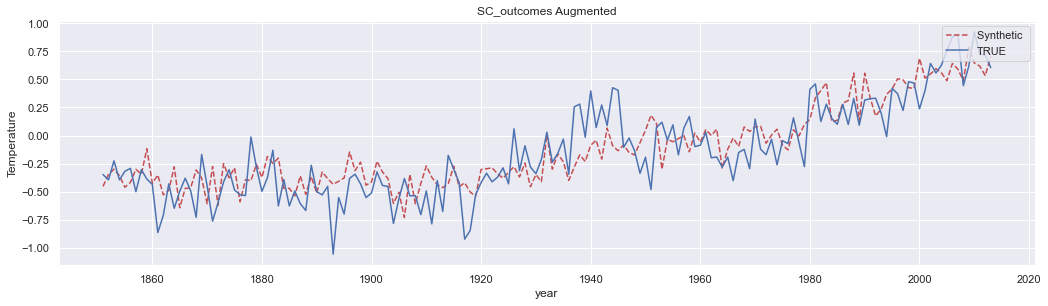

In [98]:
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),(X0_all_plot.T).dot(wasc), 'r--', label="Synthetic ")
plt.plot(range(1851,2014),true_outcomes, 'b-', label="TRUE")
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes Augmented")
#plt.savefig('sc4')
plt.show()

In [100]:
true_error = remain_error(w, X0_all,X1_all, 163,163)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(wasc),squared=False))
print('validation error: ', true_error)
print('W:', w)

mean squared reconstruction error using T=0-163:  0.22452654119540774
validation error:  0.5331859255252949
W: [ 5.04413924e-17  1.38693625e-01  2.37047645e-16  9.43779911e-01
  3.24975609e-01  1.41535973e-16 -9.83587388e-03  5.68627320e-01
  1.66263126e-16 -3.08490939e-02  2.47635155e-16]


In [101]:
from pykalman import KalmanFilter

def Kalman1D(observations,damping=1):
    # To return the smoothed time series data
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state

def Kalman1D_plot(observations,damping=1):
    # To return the plot
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    plt.plot(pred_state)
    plt.plot(observations,linestyle='--',color='grey',linewidth=0.5)

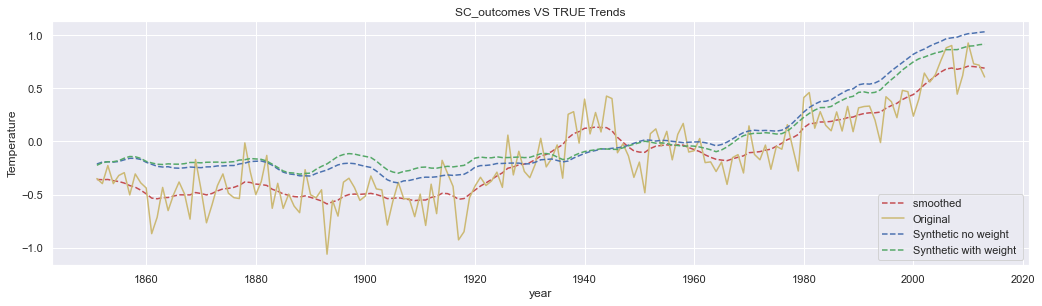

[0.00000000e+00 5.85701641e-02 2.91262412e-17 2.36180570e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.05249266e-01
 0.00000000e+00 2.07785500e-17 0.00000000e+00]
[ 5.04413924e-17  1.38693625e-01  2.37047645e-16  9.43779911e-01
  3.24975609e-01  1.41535973e-16 -9.83587388e-03  5.68627320e-01
  1.66263126e-16 -3.08490939e-02  2.47635155e-16]


In [111]:
smoothed = Kalman1D(X1_all_plot)
smoothed_pred = Kalman1D((X0_all_plot.T).dot(W0_no_weight))
smoothed_pred3 = Kalman1D((X0_all_plot.T).dot(W0_weight))
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),smoothed, 'r--', label="smoothed ")
plt.plot(range(1851,2014),X1_all_plot, 'y-', label="Original")
plt.plot(range(1851,2014),smoothed_pred, 'b--', label="Synthetic no weight  ")
plt.plot(range(1851,2014),smoothed_pred3, 'g--', label="Synthetic with weight ")
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS TRUE Trends")
plt.savefig('sc5')
plt.show()
print(W)
print(w)

# Synthetic Controls with predictors

In [119]:

data = pd.read_pickle('data')
panel_data = pd.read_pickle('panel_data')
#panel_data = panel_data.drop(index=('MPI_ESM1'))
X1_all =  panel_data.loc['TRUE']
X0_all = panel_data.loc[panel_data.index != 'TRUE', :]

#use years 120-150 as predictors leave rest  for validation
X0 = X0_all.loc[:,[i for i in list(range(120, 150))]].values.T
X1 = X1_all.loc[[i for i in list(range(120, 150))]].values.reshape(-1,1)
X0_val = X0_all.loc[:,[i for i in list(range(150, 163))]].values
X1_val = X1_all.loc[[i for i in list(range(150, 163))]].values.reshape(-1,1)
#5-year avg
X0_mean = X0_all.loc[:,[i for i in list(range(0, 120))]].values
X1_mean = X1_all.loc[[i for i in list(range(0, 120))]].values.reshape(-1,1)
X0_mean_val = X0_all.loc[:,[i for i in list(range(120, 160))]].values
X1_mean_val = X1_all.loc[[i for i in list(range(120, 160))]].values.reshape(-1,1)
X1_mean = np.average(X1_mean.reshape(-1, 5), axis=1).reshape(-1,1)
#X0_mean = np.average(X0_mean.reshape(-1, 5), axis=1).reshape(24,13)
#X0_mean_val = np.average(X0_mean_val.reshape(-1, 5), axis=1).reshape(8,13)
X1_mean_val = np.average(X1_mean_val.reshape(-1, 5), axis=1).reshape(-1,1)
#use years 0-50
X0_zero = X0_all.loc[:,[i for i in list(range(0, 50))]].values.T
X1_zero = X1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 10-60
X0_ten = X0_all.loc[:,[i for i in list(range(10, 60))]].values.T
X1_ten = X1_all.loc[[i for i in list(range(10, 60))]].values.reshape(-1,1)
#use years 20-70
X0_20 = X0_all.loc[:,[i for i in list(range(20, 70))]].values.T
X1_20 = X1_all.loc[[i for i in list(range(20, 70))]].values.reshape(-1,1)
#use years 0-70
X0_zero_70 = X0_all.loc[:,[i for i in list(range(0, 70))]].values.T
X1_zero_70 = X1_all.loc[[i for i in list(range(0, 70))]].values.reshape(-1,1)
#use years 50-100
X0_fifty = X0_all.loc[:,[i for i in list(range(50, 100))]].values.T
X1_fifty = X1_all.loc[[i for i in list(range(50, 100))]].values.reshape(-1,1)
#use years 100-150
X0_hundreed = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1_hundreed= X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 120-140
X0_120_140= X0_all.loc[:,[i for i in list(range(120, 140))]].values.T
X1_120_140 = X1_all.loc[[i for i in list(range(120, 140))]].values.reshape(-1,1)
#use years 160-100
X0_160_100 = X0_all.loc[:,[i for i in list(range(110, 163))]].values.T
X1_160_100 = X1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
X0_0_150 = X0_all.loc[:,[i for i in list(range(0, 150))]].values.T
X1_0_150 = X1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)
#use years 100-120
X0_interv_20 = X0_all.loc[:,[i for i in list(range(100, 120))]].values.T
X1_interv_20 = X1_all.loc[[i for i in list(range(100, 120))]].values.reshape(-1,1)
X0_all_plot = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X1_all_plot = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [120]:
predictors = pd.read_pickle('predictors.T')
predictors = predictors.drop(index=('MPI_ESM'))
predictors = trend.T
Z1_all = predictors.loc['TRUE']
Z0_all = predictors.loc[predictors.index != 'TRUE', :]

#use years 120-150 \
Z0 = Z0_all.loc[:,[i for i in list(range(120, 150))]].values.T
Z1 = Z1_all.loc[[i for i in list(range(120, 150))]].values.reshape(-1,1)
#use years 0-50
Z0_zero = Z0_all.loc[:,[i for i in list(range(0, 50))]].values.T
Z1_zero = Z1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 10-60
Z0_ten = Z0_all.loc[:,[i for i in list(range(10, 60))]].values.T
Z1_ten = Z1_all.loc[[i for i in list(range(10, 60))]].values.reshape(-1,1)
#use years 20-70
Z0_20 = Z0_all.loc[:,[i for i in list(range(20, 70))]].values.T
Z1_20 = Z1_all.loc[[i for i in list(range(20, 70))]].values.reshape(-1,1)
#use years 0-70
Z0_zero_70 = Z0_all.loc[:,[i for i in list(range(0, 70))]].values.T
Z1_zero_70 = Z1_all.loc[[i for i in list(range(0, 70))]].values.reshape(-1,1)
#use years 50-100
Z0_fifty = Z0_all.loc[:,[i for i in list(range(50, 100))]].values.T
Z1_fifty = Z1_all.loc[[i for i in list(range(50, 100))]].values.reshape(-1,1)
#use years 100-150
Z0_hundreed = Z0_all.loc[:,[i for i in list(range(100, 150))]].values.T
Z1_hundreed= Z1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 120-140
Z0_120_140 = Z0_all.loc[:,[i for i in list(range(120, 140))]].values.T
Z1_120_140 = Z1_all.loc[[i for i in list(range(120, 140))]].values.reshape(-1,1)
#use years 100-100
Z0_0_100 = Z0_all.loc[:,[i for i in list(range(110, 163))]].values.T
Z1_0_100 = Z1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
Z0_0_150 = Z0_all.loc[:,[i for i in list(range(0, 150))]].values.T
Z1_0_150 = Z1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)
#use years 100-120
Z0_interv_20 = Z0_all.loc[:,[i for i in list(range(100, 120))]].values.T
Z1_interv_20 = Z1_all.loc[[i for i in list(range(100, 120))]].values.reshape(-1,1)
Z0_all_plot = Z0_all.loc[:,[i for i in list(range(0, 163))]].values
Z1_all_plot = Z1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [123]:
#USE PREDICTORS
def w_mse(w, v, x0, x1): return mean_squared_error(x1, x0.dot(w), sample_weight=v)

def w_constraint(w, v, x0, x1): return np.sum(w) - 1

def v_constraint(V, W, X0, X1, Z0, Z1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=(v, x0, x1), disp=False, full_output=True)[0]

def fun_v(v, w, x0, x1, z0, z1): return mean_squared_error(z1, z0.dot(fun_w(w, v, x0, x1)))

def solve_synthetic_control2(X0, X1, Z0, Z1,weight=False):
    k,j = X0.shape
    V0 = 1/k*np.ones(k)
    l = np.linspace(1/k,1,k,endpoint=True)

    if weight:
        for i in range(0,k):
            V0[i]=l[i]*2
    W0 = 1/j*np.zeros(j).transpose()
    W0 = 1/j*np.zeros(j).transpose()
    V = fmin_slsqp(fun_v, V0, args=(W0, X0, X1, Z0, Z1), bounds=[(0.0, 1.0)]*len(V0), disp=True, f_eqcons=v_constraint, acc=1e-6)
    W = fun_w(W0, V, X0, X1)
    return V, W

V, W = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),  X0_0_150, X1_0_150)
#V, W = solve_synthetic_control(X0, X1, X0_val, X1_val)
#print(V)
#print(W)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08188100789536115
            Iterations: 7
            Function evaluations: 2121
            Gradient evaluations: 7


In [124]:
V, W = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),  X0_0_150, X1_0_150)
SC_outcomes1 = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error = remain_error(W, X0_all,X1_all, 0,150)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
#120-150
#V1, W1 = solve_synthetic_control2(np.vstack((X0,Z0)), np.vstack((X1,Z1)),  X0, X1)
#SC_outcomes0 = (X0_all_plot.T).dot(W1)
#true_outcomes = X1_all_plot
#true_error = remain_error(W1, X0_all,X1_all, 120,150)
#print('mean squared reconstruction error using T=120-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
#print('validation error: ', true_error)
#use 0-50
V, W = solve_synthetic_control2(np.vstack((X0_zero,Z0_zero)), np.vstack((X1_zero,Z1_zero)),  X0_zero, X1_zero)
SC_outcomes1 = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
#use 50-100
V0, W0 = solve_synthetic_control2(np.vstack((X0_fifty,Z0_fifty)), np.vstack((X1_fifty,Z1_fifty)),  X0_fifty, X1_fifty)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W0, X0_all,X1_all, 50,100)
print('mean squared reconstruction error using T=50-100: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 100-150
V0, W0 = solve_synthetic_control2(np.vstack((X0_hundreed,Z0_hundreed)), np.vstack((X1_hundreed,Z1_hundreed)),  X0_hundreed, X1_hundreed)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W0, X0_all,X1_all, 100,150)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 120-140
V0, W0 = solve_synthetic_control2(np.vstack((X0_120_140,Z0_120_140)), np.vstack((X1_120_140,Z1_120_140)),  X0_120_140, X1_120_140)
SC_outcomes3 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 120,140)
print('mean squared reconstruction error using T=120-140: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 0-100
V0, W01 = solve_synthetic_control2(np.vstack((X0_160_100 ,Z0_0_100)), np.vstack((X1_160_100 ,Z1_0_100)),  X0_160_100 , X1_160_100 )
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,100)
print('mean squared reconstruction error using T=0-100: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 20-70
V0, W0 = solve_synthetic_control2(np.vstack((X0_20,Z0_20)), np.vstack((X1_20,Z1_20)),  X0_20, X1_20)
SC_outcomes2 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 20,70)
print('mean squared reconstruction error using T=20-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 10-60
V0, W0 = solve_synthetic_control2(np.vstack((X0_ten,Z0_ten)), np.vstack((X1_ten,Z1_ten)),  X0_ten, X1_ten)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 10,60)
print('mean squared reconstruction error using T=10-60: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 0-70
V0, W0 = solve_synthetic_control2(np.vstack((X0_zero_70,Z0_zero_70)), np.vstack((X1_zero_70,Z1_zero_70)),  X0_zero_70, X1_zero_70)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,70)
print('mean squared reconstruction error using T=0-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
V0, W0 = solve_synthetic_control2(np.vstack((X0_all_plot.T,Z0_all_plot.T)), np.vstack((X1_all_plot,Z1_all_plot)),  X0_all_plot.T, X1_all_plot,True)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,70)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: -')
 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08188100789536115
            Iterations: 7
            Function evaluations: 2121
            Gradient evaluations: 7
mean squared reconstruction error using T=0-150:  0.08782146116051118
validation error:  0.3859638031701217
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07960657402385313
            Iterations: 4
            Function evaluations: 426
            Gradient evaluations: 4
mean squared reconstruction error using T=0-50:  0.11200125804824955
validation error:  0.3569054413415018
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04995311559358859
            Iterations: 8
            Function evaluations: 824
            Gradient evaluations: 8
mean squared reconstruction error using T=50-100:  0.10487333112758634
validation error:  0.3559270903930501
Optimization terminated successfully    (Exit

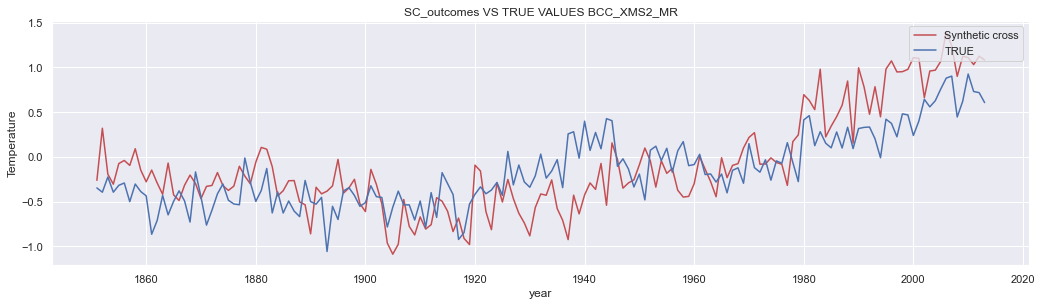

In [125]:

SC_outcomes = (X0_all_plot.T).dot(W0)
BCC_XSM2_MR_outcomes = X1_all_plot
fig = plt.figure(figsize=(17.5,4.5)) 

#plt.plot(range(1851,2014),(X0_all_plot.T).dot(W0), 'y--', label="Synthetic ");
plt.plot(range(1851,2014),SC_outcomes, 'r-', label="Synthetic cross");

plt.plot(range(1851,2014),BCC_XSM2_MR_outcomes, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE VALUES BCC_XMS2_MR")

plt.show()
fig.savefig("prop99_figure2", dpi=300)
##what does it mean that optimizing for V gives the same result as not optimizing?

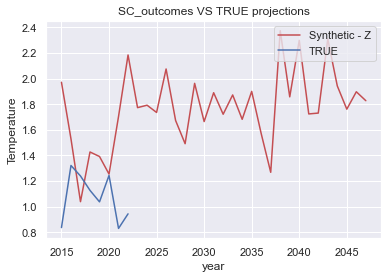

[0.8364805221400101, 1.3215710799326201, 1.2396620313735012, 1.1272278534155247, 1.0374700743273226, 1.2442480213989162, 0.8299812642028578, 0.943871047508812]
0.6976426136757882


In [128]:
proj = pd.read_pickle('projections')
X=proj

predicted_temp= (X).dot(W0)
#predicted_temp_no= (X).dot(W0_no_weight)
true = 'Downloads/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'
fh = Dataset(true, mode='r')
tas = fh.variables["tas_mean"][:]
temp_mean = tas.mean(axis =(1,2))
proj_true_temp=temp_mean[1979:]
proj_true_temp = np.average(proj_true_temp.reshape(-1, 3), axis=1)
proj =[]
for i in range(0,29,4):
    proj.append(proj_true_temp[i])
plt.plot(range(2015,2048),predicted_temp, 'r-', label="Synthetic - Z");
plt.plot(range(2015,2023),proj, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE projections")

plt.show()
print(proj)
print(mean_squared_error( np.array(proj),predicted_temp[:8],squared=False))

(11, 163)
(9, 33)
(196, 11)


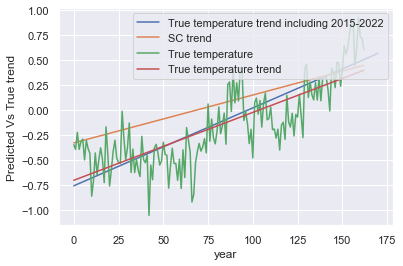

[2.05427007e-17 0.00000000e+00 0.00000000e+00 3.92478885e-01
 6.07521115e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.58422901e-17 4.06098616e-17 0.00000000e+00]


In [371]:
X= pd.read_pickle('projections2').drop(columns=['MPI_ESM1'])
x=np.arange(0,163).reshape(-1, 1)
x2= np.arange(0,163+8).reshape(-1, 1)
x3= np.arange(0,196).reshape(-1, 1)
model = LinearRegression()
model.fit(x, X1_all_plot)
# calculate trend
trend_true = model.predict(x)
model.fit(x,(X0_all_plot.T).dot(W01))
trend_sc =  model.predict(x)
#calculate trend until 2022
print(X0_all_plot.shape)
print(X.to_numpy().T.shape)
extended_true = np.concatenate((X1_all_plot.reshape(163),np.array(proj).reshape(8)))
#extended_synthetic = np.concatenate((X0_all_plot.T,X.to_numpy()))
model.fit(x2, extended_true)
extended = model.predict(x2)
print(extended_synthetic.shape)
model.fit(x3, extended_synthetic.dot(W01))
extended_s = model.predict(x3)

# plot trend
plt.plot(extended, label ='True temperature trend including 2015-2022')
plt.plot(trend_sc , label ='SC trend')
#plt.plot(extended_s, label ='SC temperature trend including 2015-2022')
plt.plot(X1_all_plot, label ='True temperature')
plt.plot(trend_true, label = 'True temperature trend ')
plt.ylabel('Predicted Vs True trend')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.show()
print(W0)

Notes: 

# SC as State Space Models 